# Diabetes Prediction

According to the report of Centers of Disease Control and Prevention about one in seven adults in the United States have Diabetes. But by next few years this rate can move higher. With this in mind today, In this article, I will show you how you can use machine learning to Predict Diabetes using Python.

Dataset :- https://www.kaggle.com/paultimothymooney/predict-diabetes-from-medical-records/data

In [13]:
#importing libraries
import numpy as np #2 perform mathematical operations on arrays
import pandas as pd #for data analysis
import seaborn as sns #statistical graphics

from sklearn.preprocessing import StandardScaler #resize the distribution of values
from sklearn.model_selection import train_test_split #measure the accuracy of the model 
from sklearn import svm #fit the data u provide, returning a "best fit" hyperplane that devides/categorizes ur data
from sklearn.metrics import accuracy_score #measure model performance
from sklearn.model_selection import cross_val_score #statistical method used to estimate the performance (or accuracy) of machine learning models

Data Collection and Analysis

PIMA Diabetes Dataset

In [14]:
#load the dataset 2 pandas data frame for manupulating the data
raw_diabetes_data = pd.read_csv('diabetes.csv', encoding = 'latin-1')

#now v hv 2 replace null values with null string otherwise it will show errors
#v will store this in variable claaed "mail_data"
diabetes_dataset = raw_diabetes_data.where((pd.notnull(raw_diabetes_data)), '')

#lets check the shape of the dataset
diabetes_dataset.shape

(768, 9)

In [15]:
# printing the first 10 rows of the dataset
diabetes_dataset.head(10)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0
6,3,78,50,32,88,31.0,0.248,26,1
7,10,115,0,0,0,35.3,0.134,29,0
8,2,197,70,45,543,30.5,0.158,53,1
9,8,125,96,0,0,0.0,0.232,54,1


In [16]:
#now lets c statistical values of data
#Basic Descriptive statistics on the data
diabetes_dataset.describe(include = "all")

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


### Counterplot
Showing the total count of malignant and benign tumor patients in counterplot.

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


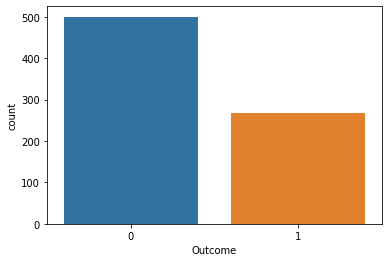

In [17]:
#counts no of observations per category
sns.countplot(diabetes_dataset['Outcome'])

#### Checking Number of Diabetic and Non Diabetic cases

In [18]:
#v can c how many examples r there for class 1 & 0
print(diabetes_dataset['Outcome'].value_counts()) 

0    500
1    268
Name: Outcome, dtype: int64


0 --> Non-Diabetic

1 --> Diabetic

In [19]:
#v r just finding the mean values of diabetic & non diabetic
#the mean value of non diabetic is less thn compared 2 diabetic
#this difference is very imp for us & this is how our ML Algo can find the difference b/w / it can predict b/w diabetic & non diabetic
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Splitting the data into data & labels

In [20]:
#assigning data(Pregnancies, Glucose, ....., Age) as X
#v r gonna drop the outcome column 
#as v r droping the column v need 2 mention axis = 1
X = diabetes_dataset.drop(columns = 'Outcome', axis = 1)

#assigning labels(0 & 1) as Y
Y = diabetes_dataset['Outcome']

In [21]:
print(X) #printing the data(Pregnancies, Glucose, ....., Age)
print("-----------------------------------------------------------------------------------------------")
print(Y) #printing the labels(0 & 1)

     Pregnancies  Glucose  BloodPressure  ...   BMI  DiabetesPedigreeFunction  Age
0              6      148             72  ...  33.6                     0.627   50
1              1       85             66  ...  26.6                     0.351   31
2              8      183             64  ...  23.3                     0.672   32
3              1       89             66  ...  28.1                     0.167   21
4              0      137             40  ...  43.1                     2.288   33
..           ...      ...            ...  ...   ...                       ...  ...
763           10      101             76  ...  32.9                     0.171   63
764            2      122             70  ...  36.8                     0.340   27
765            5      121             72  ...  26.2                     0.245   30
766            1      126             60  ...  30.1                     0.349   47
767            1       93             70  ...  30.4                     0.315   23

[76

Data Standardization

In [22]:
#if there is a difference in the range of all these values
#it will b difficult for our ml model 2 make sm predictions
#in  ost cases v try 2 standardize the data in a particular range & that helps our ml 2 make better predictions
#v r loading the StandardScaler & fitting the data 2 the variable "x" 
#v r fitting all these inconsistent data wyt out StandardScaler function 
#now v need transform this data 
#based on that Standardization v r transforming all the data 2 the common range
scaler = StandardScaler()
scaler.fit(X)
standardized_data = scaler.transform(X)
X = standardized_data

In [23]:
print(X) #print this data in the standardized data
print("-----------------------------------------------------------------------------------------------")
print(Y) #printing the labels(0 & 1)

#as v can c here all these values here r in the range of 0 & 1
#so this will help our model 2 make better predictions 
#coz all the values r almost in the similar range

[[ 0.63994726  0.84832379  0.14964075 ...  0.20401277  0.46849198
   1.4259954 ]
 [-0.84488505 -1.12339636 -0.16054575 ... -0.68442195 -0.36506078
  -0.19067191]
 [ 1.23388019  1.94372388 -0.26394125 ... -1.10325546  0.60439732
  -0.10558415]
 ...
 [ 0.3429808   0.00330087  0.14964075 ... -0.73518964 -0.68519336
  -0.27575966]
 [-0.84488505  0.1597866  -0.47073225 ... -0.24020459 -0.37110101
   1.17073215]
 [-0.84488505 -0.8730192   0.04624525 ... -0.20212881 -0.47378505
  -0.87137393]]
-----------------------------------------------------------------------------------------------
0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


## Dividing data into train and test data using sklearn's train_test_split()

In [24]:
#spliting the dataset in2 Training & Testing

#test size --> 2 specify the percentage of test data needed ==> 0.2 ==> 20%

#random state --> specific split of data each value of random_state splits the data differently, v can put any state v want
#v need 2 specify the same random_state everytym if v want 2 split the data the same way everytym

#stratifying it based on the y, so that the data is split in the crt way
#stratify --> for crt distribution of data as of the original data(2 split the data correctly as of the original data)
#if i dont mention stratify = y, the distribution of 0 & 1 can b very different in the training data & testing data
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, stratify = Y, random_state = 2)

In [25]:
#lets c how many examples r there for each cases
#checking dimensions of data
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [26]:
#lets c how many examples r there for each cases
#checking dimensions of labels
print(Y.shape, Y_train.shape, Y_test.shape)

(768,) (614,) (154,)


## Our data is ready to be applied a machine learning algorithm

# ***SVM***

### Implementing Support Vector Machine Algorithm

In [27]:
#training the support vector Machine Classifier
#loading the SVM 2 the variable "classifier"
#training the SVM Model with Training Data
#v r fitting the data x_train, y_train 2 the model which is the svm model, so the model is trained with the data
#linear kernel SVM is used whn the data is Linearly separable(separated using single line)
#it is used whn there r large no of features in particular dataset
#train a linear SVM classifier on the training data
classifier = svm.SVC(kernel = 'linear').fit(X_train, Y_train)

## Model Evaluation

### Predicting seen data with our SVM ML model

In [28]:
#prediction on train_data
X_train_prediction = classifier.predict(X_train)
X_train_prediction

array([0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,

### Predicting unseen data with our SVM ML model

In [29]:
#prediction on test_data
X_test_prediction = classifier.predict(X_test)
X_test_prediction

array([0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

## Checking Accuracy of SVM ML model with training data and testing data

In [30]:
#v r finding the accuracy_score on the training data 2 check how the model performs on traing data 
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

#v r finding the accuracy_score on the testing data 2 check how the model performs on testing data 
test_data_accuracy = accuracy_score(X_test_prediction, Y_test)

In [31]:
#print the accuracy_score on training data
print('Accuracy score of the training data : ', training_data_accuracy)

#print the accuracy_score on testing data
print('Accuracy score of the test data : ', test_data_accuracy)

Accuracy score of the training data :  0.7866449511400652
Accuracy score of the test data :  0.7727272727272727


## SVM ML MODEL SCORE

In [32]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the training data 
classifier.score(X_train, Y_train)

0.7866449511400652

In [33]:
#mean accuracy (accuracy score)
#measuring the accuracy of the model against the test data 
classifier.score(X_test, Y_test)

0.7727272727272727

In [34]:
#cross validation
#it is used to protect against overfitting in a predictive model, 
#particularly in a case where the amount of data may be limited. In cross-validation, 
#you make a fixed number of folds (or partitions) of the data, run the analysis on each fold, and then average the overall error estimate.
#cv = 5 ==> partition the data in2 4 Training & 1 Testing Data parts
print(cross_val_score(classifier, X, Y, cv = 5))

[0.76623377 0.75974026 0.75974026 0.81699346 0.76470588]


Making a Predictive System

In [35]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


# **Summary**
As we can see all our models have performed brilliantly after feature selection and is giving good out of sample accuracy. Hence, there is no need for Optimization/Hyperparameter Optimization, So we can state that our model is ready to be deployed. So this is how we can build a Diabetes detection model using Machine Learning and the Python programming language. I hope you liked this project on how to build a diabetes detection model with Machine Learning. 

# Saving the trained model

In [36]:
import pickle #keeps track of the objects it has already serialized ==> allows saving model in very little tym

In [38]:
#save the model trained in the file "trained_model.sav" to a new file called "diabetes_trained_model.pkl"
filename = 'diabetes_trained_model.sav'
pickle.dump(classifier, open(filename, 'wb'))

In [39]:
#loading the saved model
loaded_model = pickle.load(open('diabetes_trained_model.sav', 'rb'))

In [40]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# changing the input_data to numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the array as we are predicting for one instance
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the input data
std_data = scaler.transform(input_data_reshaped)
print(std_data)

prediction = classifier.predict(std_data)
print(prediction)

if (prediction[0] == 0):
  print('The person is not diabetic')
else:
  print('The person is diabetic')

[[ 0.3429808   1.41167241  0.14964075 -0.09637905  0.82661621 -0.78595734
   0.34768723  1.51108316]]
[1]
The person is diabetic


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:446: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"
